# MonthWise Market Arrivals

# Importing The Libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing The Dataset

In [3]:
data = pd.read_csv("C:/Users/chandu/Downloads/Paper1/MonthWiseMarketArrivals_Clean.csv",header=None)

# Featuring The Data

In [4]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
1,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
2,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
3,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
4,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011


In [6]:
data = pd.read_csv("C:/Users/chandu/Downloads/Paper1/MonthWiseMarketArrivals_Clean.csv",header=0)

In [7]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [8]:
df = data

In [9]:
df.shape

(10227, 10)

In [10]:
pd.unique(df['market'])

array(['ABOHAR(PB)', 'AGRA(UP)', 'AHMEDABAD(GUJ)', 'AHMEDNAGAR(MS)',
       'AJMER(RAJ)', 'ALIGARH(UP)', 'ALWAR(RAJ)', 'AMRITSAR(PB)',
       'BALLIA(UP)', 'BANGALORE', 'BAREILLY(UP)', 'BELGAUM(KNT)',
       'BHATINDA(PB)', 'BHAVNAGAR(GUJ)', 'BHOPAL', 'BHUBNESWER(OR)',
       'BIHARSHARIF(BHR)', 'BIJAPUR(KNT)', 'BIKANER(RAJ)', 'BOMBORI(MS)',
       'BURDWAN(WB)', 'CHAKAN(MS)', 'CHALLAKERE(KNT)', 'CHANDIGARH',
       'CHANDVAD(MS)', 'CHENNAI', 'CHICKBALLAPUR(KNT)',
       'COIMBATORE(TN) (bellary)', 'COIMBATORE(TN) (podisu)',
       'DEESA(GUJ)', 'DEHRADOON(UTT)', 'DELHI', 'DEORIA(UP)',
       'DEVALA(MS)', 'DEWAS(MP)', 'DHAVANGERE(KNT)', 'DHULIA(MS)',
       'DINDIGUL(TN)', 'DINDIGUL(TN)(Podis', 'DINDORI(MS)', 'ETAWAH(UP)',
       'GONDAL(GUJ)', 'GORAKHPUR(UP)', 'GUWAHATI', 'HALDWANI(UTT)',
       'HASSAN(KNT)', 'HOSHIARPUR(PB)', 'HUBLI(KNT)', 'HYDERABAD',
       'INDORE(MP)', 'JAIPUR', 'JALANDHAR(PB)', 'JALGAON(MS)',
       'JALGAON(WHITE)', 'JAMMU', 'JAMNAGAR(GUJ)', 'JODHPUR(RAJ)',
 

# Performing EDA

In [11]:
df.isna().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [12]:
df.dropna(inplace = True)

In [13]:
df.drop(['state','city','date'], axis = 1)

,market,month,year,quantity,priceMin,priceMax,priceMod
0,ABOHAR(PB),January,2005,2350,404,493,446
1,ABOHAR(PB),January,2006,900,487,638,563
2,ABOHAR(PB),January,2010,790,1283,1592,1460
3,ABOHAR(PB),January,2011,245,3067,3750,3433
4,ABOHAR(PB),January,2012,1035,523,686,605
...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526
10223,YEOLA(MS),December,2012,207066,485,1327,1136
10224,YEOLA(MS),December,2013,215883,472,1427,1177
10225,YEOLA(MS),December,2014,201077,446,1654,1456


In [14]:
df.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [15]:
df.iloc[:,2:7] = df.iloc[:,2:7].astype(int)

In [16]:
df.dtypes

market      object
month       object
year         int32
quantity     int32
priceMin     int32
priceMax     int32
priceMod     int32
state       object
city        object
date        object
dtype: object

In [17]:
df.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


In [18]:
df["state"] = df.market.str.split("(").str[-1]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB),ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB),ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB),ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB),ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB),ABOHAR,January-2012


In [19]:
df["city"] = df.market.str.split("(").str[0]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB),ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB),ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB),ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB),ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB),ABOHAR,January-2012


In [20]:
df.state.unique()

array(['PB)', 'UP)', 'GUJ)', 'MS)', 'RAJ)', 'BANGALORE', 'KNT)', 'BHOPAL',
       'OR)', 'BHR)', 'WB)', 'CHANDIGARH', 'CHENNAI', 'bellary)',
       'podisu)', 'UTT)', 'DELHI', 'MP)', 'TN)', 'Podis', 'GUWAHATI',
       'HYDERABAD', 'JAIPUR', 'WHITE)', 'JAMMU', 'HR)', 'KOLKATA', 'AP)',
       'LUCKNOW', 'MUMBAI', 'NAGPUR', 'KER)', 'PATNA', 'CHGARH)', 'JH)',
       'SHIMLA', 'SRINAGAR', 'TRIVENDRUM'], dtype=object)

In [21]:
df_state = df.groupby(["state","market"], as_index = False).count()
df_state.market.unique()

array(['KURNOOL(AP)', 'RAJAHMUNDRY(AP)', 'BANGALORE', 'BHOPAL',
       'BIHARSHARIF(BHR)', 'CHANDIGARH', 'CHENNAI', 'RAIPUR(CHGARH)',
       'DELHI', 'AHMEDABAD(GUJ)', 'BHAVNAGAR(GUJ)', 'DEESA(GUJ)',
       'GONDAL(GUJ)', 'JAMNAGAR(GUJ)', 'MAHUVA(GUJ)', 'RAJKOT(GUJ)',
       'SURAT(GUJ)', 'GUWAHATI', 'KARNAL(HR)', 'HYDERABAD', 'JAIPUR',
       'JAMMU', 'RANCHI(JH)', 'PALAYAM(KER)', 'BELGAUM(KNT)',
       'BIJAPUR(KNT)', 'CHALLAKERE(KNT)', 'CHICKBALLAPUR(KNT)',
       'DHAVANGERE(KNT)', 'HASSAN(KNT)', 'HUBLI(KNT)', 'KOLAR(KNT)',
       'RAICHUR(KNT)', 'KOLKATA', 'LUCKNOW', 'DEWAS(MP)', 'INDORE(MP)',
       'MANDSOUR(MP)', 'NEEMUCH(MP)', 'SAGAR(MP)', 'UJJAIN(MP)',
       'AHMEDNAGAR(MS)', 'BOMBORI(MS)', 'CHAKAN(MS)', 'CHANDVAD(MS)',
       'DEVALA(MS)', 'DHULIA(MS)', 'DINDORI(MS)', 'JALGAON(MS)',
       'JUNNAR(MS)', 'KALVAN(MS)', 'KOLHAPUR(MS)', 'KOPERGAON(MS)',
       'LASALGAON(MS)', 'LONAND(MS)', 'MALEGAON(MS)', 'MANMAD(MS)',
       'NANDGAON(MS)', 'NASIK(MS)', 'NEWASA(MS)', 'NIPHAD(

In [22]:
state_now = ['PB', 'UP', 'GUJ', 'MS', 'RAJ', 'BANGALORE', 'KNT', 'BHOPAL', 'OR',
       'BHR', 'WB', 'CHANDIGARH', 'CHENNAI', 'bellary', 'podisu', 'UTT',
       'DELHI', 'MP', 'TN', 'Podis', 'GUWAHATI', 'HYDERABAD', 'JAIPUR',
       'WHITE', 'JAMMU', 'HR', 'KOLKATA', 'AP', 'LUCKNOW', 'MUMBAI',
       'NAGPUR', 'KER', 'PATNA', 'CHGARH', 'JH', 'SHIMLA', 'SRINAGAR',
       'TRIVENDRUM']
state_new =['PB', 'UP', 'GUJ', 'MS', 'RAJ', 'KNT', 'KNT', 'MP', 'OR',
       'BHR', 'WB', 'CH', 'TN', 'KNT', 'TN', 'UP',
       'DEL', 'MP', 'TN', 'TN', 'ASM', 'AP', 'RAJ',
       'MS', 'JK', 'HR', 'WB', 'AP', 'UP', 'MS',
       'MS', 'KER', 'BHR', 'HR', 'JH', 'HP', 'JK',
       'KEL']
df.state = df.state.replace(state_now, state_new)
df.state.unique()

array(['PB)', 'UP)', 'GUJ)', 'MS)', 'RAJ)', 'KNT', 'KNT)', 'MP', 'OR)',
       'BHR)', 'WB)', 'CH', 'TN', 'bellary)', 'podisu)', 'UTT)', 'DEL',
       'MP)', 'TN)', 'ASM', 'AP', 'RAJ', 'WHITE)', 'JK', 'HR)', 'WB',
       'AP)', 'UP', 'MS', 'KER)', 'BHR', 'CHGARH)', 'JH)', 'HP', 'KEL'],
      dtype=object)

In [23]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB),ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB),ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB),ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB),ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB),ABOHAR,January-2012


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int32 
 3   quantity  10227 non-null  int32 
 4   priceMin  10227 non-null  int32 
 5   priceMax  10227 non-null  int32 
 6   priceMod  10227 non-null  int32 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int32(5), object(5)
memory usage: 679.1+ KB


In [25]:
df.date = pd.DatetimeIndex(df.date)
df.dtypes

market              object
month               object
year                 int32
quantity             int32
priceMin             int32
priceMax             int32
priceMod             int32
state               object
city                object
date        datetime64[ns]
dtype: object

In [26]:
pd.unique(df.city)

array(['ABOHAR', 'AGRA', 'AHMEDABAD', 'AHMEDNAGAR', 'AJMER', 'ALIGARH',
       'ALWAR', 'AMRITSAR', 'BALLIA', 'BANGALORE', 'BAREILLY', 'BELGAUM',
       'BHATINDA', 'BHAVNAGAR', 'BHOPAL', 'BHUBNESWER', 'BIHARSHARIF',
       'BIJAPUR', 'BIKANER', 'BOMBORI', 'BURDWAN', 'CHAKAN', 'CHALLAKERE',
       'CHANDIGARH', 'CHANDVAD', 'CHENNAI', 'CHICKBALLAPUR', 'COIMBATORE',
       'DEESA', 'DEHRADOON', 'DELHI', 'DEORIA', 'DEVALA', 'DEWAS',
       'DHAVANGERE', 'DHULIA', 'DINDIGUL', 'DINDORI', 'ETAWAH', 'GONDAL',
       'GORAKHPUR', 'GUWAHATI', 'HALDWANI', 'HASSAN', 'HOSHIARPUR',
       'HUBLI', 'HYDERABAD', 'INDORE', 'JAIPUR', 'JALANDHAR', 'JALGAON',
       'JAMMU', 'JAMNAGAR', 'JODHPUR', 'JUNNAR', 'KALVAN', 'KANPUR',
       'KARNAL', 'KHANNA', 'KOLAR', 'KOLHAPUR', 'KOLKATA', 'KOPERGAON',
       'KOTA', 'KURNOOL', 'LASALGAON', 'LONAND', 'LUCKNOW', 'LUDHIANA',
       'MADURAI', 'MAHUVA', 'MALEGAON', 'MANDSOUR', 'MANMAD', 'MEERUT',
       'MIDNAPUR', 'MUMBAI', 'NAGPUR', 'NANDGAON', 'NASIK', 'NEEMU

In [27]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB),ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB),ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB),ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB),ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB),ABOHAR,2012-01-01


# The price variation in Onion prices in Mumbai

In [28]:
df_mum = df[df.city == "MUMBAI"]
df_mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,2005-01-01
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,2006-01-01
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,2007-01-01
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,2008-01-01


In [29]:
pd.set_option("precision", 0)
df_mum.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146,146,146,146,146
mean,2010,221721,901,1317,1114
std,4,40793,731,1019,883
min,2004,131590,215,335,287
25%,2007,195125,434,648,544
50%,2010,222220,692,982,846
75%,2013,246050,1099,1623,1392
max,2016,413681,4005,5517,4714


In [30]:
df_mum.index

Int64Index([6654, 6655, 6656, 6657, 6658, 6659, 6660, 6661, 6662, 6663,
            ...
            6790, 6791, 6792, 6793, 6794, 6795, 6796, 6797, 6798, 6799],
           dtype='int64', length=146)

In [31]:
df_mum = df_mum.sort_values(by="date")
df_mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
6667,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI,2004-02-01
6680,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI,2004-03-01
6692,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01
6704,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI,2004-05-01


In [32]:
df_mum.index = pd.PeriodIndex(df_mum.date, freq='M')
df_mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
2004-02,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI,2004-02-01
2004-03,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI,2004-03-01
2004-04,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01
2004-05,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI,2004-05-01


# Visualization of Prices over Time 

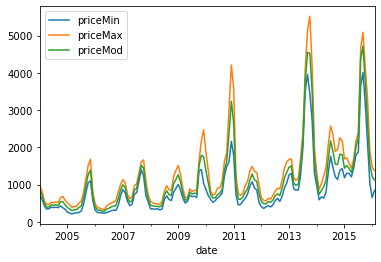

In [33]:
df_mum.plot(kind="line", y=["priceMin" ,"priceMax" ,"priceMod"])
plt.show()

In [34]:
df_mum["monthVal"] = pd.DatetimeIndex(df_mum["date"]).month
df_mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,monthVal
date,,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01,1
2004-02,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI,2004-02-01,2
2004-03,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI,2004-03-01,3
2004-04,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01,4
2004-05,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI,2004-05-01,5


In [35]:
df_mum["priceDiff"] = df_mum["priceMax"] - df_mum["priceMin"]
df_mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,monthVal,priceDiff
date,,,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01,1,252
2004-02,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI,2004-02-01,2,220
2004-03,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI,2004-03-01,3,121
2004-04,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01,4,129
2004-05,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI,2004-05-01,5,109


In [36]:
df_mumPivot = pd.pivot_table(df_mum, values = "priceDiff", 
                             columns = "year", index = "monthVal")
df_mumPivot

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
monthVal,,,,,,,,,,,,,
1,252,252,173,270,202,506,998,1804,241,414,345,503,819
2,220,222,133,278,157,423,671,524,214,391,282,415,528
3,121,175,121,179,154,258,228,312,158,308,346,270,NaN
4,129,181,103,194,126,140,198,239,196,260,600,236,NaN
5,109,168,101,197,142,100,187,213,209,312,658,252,NaN
6,134,255,187,227,204,170,264,340,252,450,746,373,NaN
7,129,265,195,242,221,140,225,339,260,406,810,532,NaN
8,139,313,212,226,269,156,321,409,267,568,872,1006,NaN
9,139,373,215,221,267,204,391,416,340,1175,679,1084,NaN


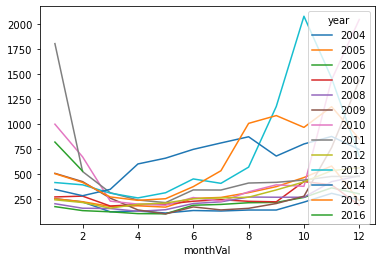

In [37]:
df_mumPivot.plot()
plt.show()

<AxesSubplot:ylabel='Frequency'>

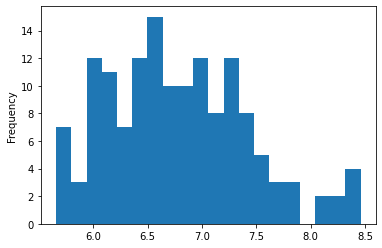

In [38]:
df_mum["log_priceMod"] = np.log(df_mum.priceMod)
df_mum.log_priceMod.plot(kind="hist", bins=20)

# Onion price in Mumbai

In [39]:
df_mum = df.loc[df.city == "MUMBAI"].copy()
df_mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,2005-01-01
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,2006-01-01
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,2007-01-01
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,2008-01-01


In [41]:
df_mum = df_mum.drop(["market","month","year","priceMin","priceMax","state","city"], axis=1)
df_mum.head()

,quantity,priceMod,date
6654,267100,849,2004-01-01
6655,275845,387,2005-01-01
6656,228000,402,2006-01-01
6657,205200,997,2007-01-01
6658,267550,448,2008-01-01


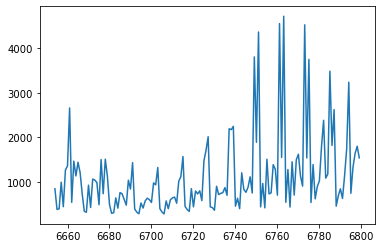

In [42]:
df_mum.priceMod.plot()
plt.show()

# Log Transformation

<AxesSubplot:ylabel='Frequency'>

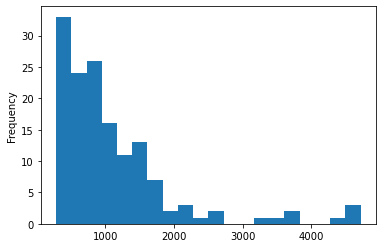

In [43]:
df_mum.priceMod.plot(kind="hist", bins=20)

<AxesSubplot:ylabel='Frequency'>

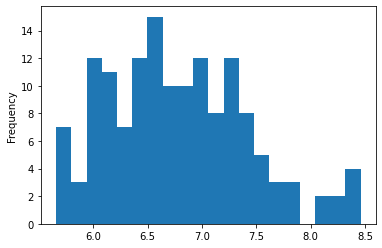

In [44]:
df_mum["log_priceMod"] = np.log(df_mum.priceMod)
df_mum.log_priceMod.plot(kind="hist", bins=20)

# Time Series Model

# Mean Constant Model

In [45]:
df_mum_mean = df_mum.log_priceMod.mean()
df_mum["mean_price"] = np.exp(df_mum_mean)
df_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price
6654,267100,849,2004-01-01,7,889
6655,275845,387,2005-01-01,6,889
6656,228000,402,2006-01-01,6,889
6657,205200,997,2007-01-01,7,889
6658,267550,448,2008-01-01,6,889


<AxesSubplot:xlabel='date'>

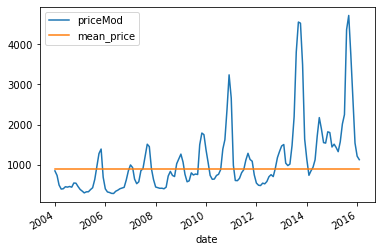

In [46]:
df_mum.plot(kind="line", x="date", y=["priceMod", "mean_price"])

# Evaluating Using RMSE model

In [47]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [48]:
mean_modelRMSE = RMSE(df_mum.priceMod, df_mum.mean_price)
mean_modelRMSE

908.4772843986449

# Saving The RMSE dataframe

In [49]:
Result_df = pd.DataFrame(columns =["Model","Forcast","RMSE"])
Result_df.loc[0,"Model"] = "Mean Model"
Result_df.loc[0,"Forcast"] = np.exp(df_mum_mean)
Result_df.loc[0,"RMSE"] = mean_modelRMSE
Result_df

,Model,Forcast,RMSE
0,Mean Model,889,908


# Linear Trend Model

In [51]:
df_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price
6654,267100,849,2004-01-01,7,889
6655,275845,387,2005-01-01,6,889
6656,228000,402,2006-01-01,6,889
6657,205200,997,2007-01-01,7,889
6658,267550,448,2008-01-01,6,889


In [52]:
df_mum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 6654 to 6799
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   quantity      146 non-null    int32         
 1   priceMod      146 non-null    int32         
 2   date          146 non-null    datetime64[ns]
 3   log_priceMod  146 non-null    float64       
 4   mean_price    146 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int32(2)
memory usage: 5.7 KB


In [53]:
df_mum["timeindex"] = df_mum.date - df_mum.date.min()
df_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
6654,267100,849,2004-01-01,7,889,0 days
6655,275845,387,2005-01-01,6,889,366 days
6656,228000,402,2006-01-01,6,889,731 days
6657,205200,997,2007-01-01,7,889,1096 days
6658,267550,448,2008-01-01,6,889,1461 days


In [54]:
df_mum.dtypes

quantity                  int32
priceMod                  int32
date             datetime64[ns]
log_priceMod            float64
mean_price              float64
timeindex       timedelta64[ns]
dtype: object

In [55]:
# converting the timeindex into months using timedelta
df_mum["timeindex"] = df_mum["timeindex"]/np.timedelta64(1,"M")
df_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
6654,267100,849,2004-01-01,7,889,0
6655,275845,387,2005-01-01,6,889,12
6656,228000,402,2006-01-01,6,889,24
6657,205200,997,2007-01-01,7,889,36
6658,267550,448,2008-01-01,6,889,48


In [56]:
df_mum["timeindex"] = df_mum["timeindex"].round(0).astype(int)
df_mum.tail()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
6795,290350,749,2011-12-01,7,889,95
6796,218500,1330,2012-12-01,7,889,107
6797,226385,1639,2013-12-01,7,889,119
6798,294150,1802,2014-12-01,7,889,131
6799,302409,1542,2015-12-01,7,889,143


# Applying The Linear Model

In [60]:
linear_model = smf.ols('log_priceMod ~ timeindex', data = df_mum).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     129.3
Date:                Sun, 22 May 2022   Prob (F-statistic):           8.89e-22
Time:                        10:14:04   Log-Likelihood:                -96.121
No. Observations:                 146   AIC:                             196.2
Df Residuals:                     144   BIC:                             202.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0284      0.078     77.785      0.000       5.875       6.182
timeindex      0.0105      0.001     11.370      0.000       0.009       0.012
==============================================================================
Omnibus:                        7.658   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.054
Skew:                           0.566   Prob(JB):                       0.0178
Kurtosis:                       2.791   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
linear_model_pred = linear_model.predict()
linear_model_pred

array([6.02841087, 6.15450176, 6.28059265, 6.40668353, 6.53277442,
       6.65886531, 6.7849562 , 6.91104708, 7.03713797, 7.16322886,
       7.28931975, 7.41541064, 7.54150152, 6.03891844, 6.16500933,
       6.29110022, 6.41719111, 6.543282  , 6.66937288, 6.79546377,
       6.92155466, 7.04764555, 7.17373643, 7.29982732, 7.42591821,
       7.5520091 , 6.04942602, 6.17551691, 6.30160779, 6.42769868,
       6.55378957, 6.67988046, 6.80597134, 6.93206223, 7.05815312,
       7.18424401, 7.3103349 , 7.43642578, 6.05993359, 6.18602448,
       6.31211537, 6.43820626, 6.56429714, 6.69038803, 6.81647892,
       6.94256981, 7.06866069, 7.19475158, 7.32084247, 7.44693336,
       6.07044117, 6.19653205, 6.32262294, 6.44871383, 6.57480472,
       6.70089561, 6.82698649, 6.95307738, 7.07916827, 7.20525916,
       7.33135004, 7.45744093, 6.08094874, 6.20703963, 6.33313052,
       6.4592214 , 6.58531229, 6.71140318, 6.83749407, 6.96358495,
       7.08967584, 7.21576673, 7.34185762, 7.46794851, 6.09145

In [66]:
# Manual Calculation
model_linear_forecast_manual = 0.0093 * 146 + 6.1121
model_linear_forecast_manual

7.4699

In [67]:
df_mum["linear_price"] = np.exp(linear_model_pred)
df_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price
6654,267100,849,2004-01-01,7,889,0,415
6655,275845,387,2005-01-01,6,889,12,471
6656,228000,402,2006-01-01,6,889,24,534
6657,205200,997,2007-01-01,7,889,36,606
6658,267550,448,2008-01-01,6,889,48,687


# Evaluating Using RMSE model

In [68]:
linear_model_RMSE = RMSE(df_mum.priceMod, df_mum.linear_price)
linear_model_RMSE

724.7073314178772

In [69]:
Result_df.loc[1,"Model"] = "Linear Model"
Result_df.loc[1,"Forcast"] = np.exp(model_linear_forecast_manual)
Result_df.loc[1,"RMSE"] = linear_model_RMSE
Result_df

,Model,Forcast,RMSE
0,Mean Model,889,908
1,Linear Model,1754,725


In [70]:
linear_model_quant = smf.ols('log_priceMod ~ timeindex + np.log(quantity)', data = df_mum).fit()
linear_model_quant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     77.15
Date:                Sun, 22 May 2022   Prob (F-statistic):           1.88e-23
Time:                        10:27:09   Log-Likelihood:                -89.461
No. Observations:                 146   AIC:                             184.9
Df Residuals:                     143   BIC:                             193.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.2955      2.508      6.097      0.000      10.337      20.254
timeindex            0.0109      0.001     12.216      0.000       0.009       0.013
np.log(quantity)    -0.7562      0.205     -3.696      0.000      -1.161      -0.352
==============================================================================
Omnibus:                        4.787   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.880
Skew:                           0.429   Prob(JB):                       0.0872
Kurtosis:                       2.742   Cond. No.                     5.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

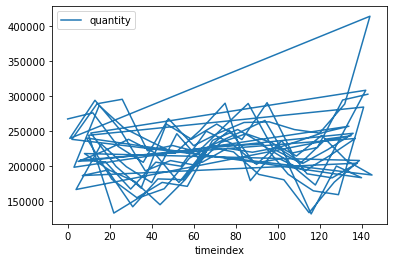

In [71]:
df_mum["linear_price_quant"] = np.exp(linear_model_quant.predict())
df_mum.plot(kind = "line", x="timeindex", y = "quantity")
plt.show()

# Random Walk Model

In [72]:
df_mum["shift_log_priceMod"] = df_mum.log_priceMod.shift()
df_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod
6654,267100,849,2004-01-01,7,889,0,415,346,NaN
6655,275845,387,2005-01-01,6,889,12,471,385,7
6656,228000,402,2006-01-01,6,889,24,534,507,6
6657,205200,997,2007-01-01,7,889,36,606,625,6
6658,267550,448,2008-01-01,6,889,48,687,583,7


<AxesSubplot:>

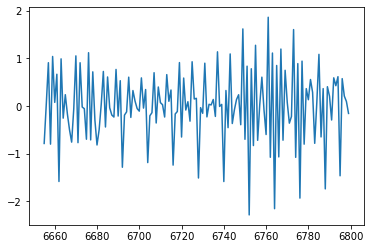

In [73]:
df_mum["log_priceMod_diff"] = df_mum.log_priceMod - df_mum.shift_log_priceMod
df_mum.log_priceMod_diff.plot()

In [74]:
df_mum["random_price"] = np.exp(df_mum.shift_log_priceMod)
df_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod,log_priceMod_diff,random_price
6654,267100,849,2004-01-01,7,889,0,415,346,NaN,NaN,NaN
6655,275845,387,2005-01-01,6,889,12,471,385,7,-8e-01,849
6656,228000,402,2006-01-01,6,889,24,534,507,6,4e-02,387
6657,205200,997,2007-01-01,7,889,36,606,625,6,9e-01,402
6658,267550,448,2008-01-01,6,889,48,687,583,7,-8e-01,997


# Evaluating Using RMSE model

In [75]:
random_model_RMSE = RMSE(df_mum.priceMod, df_mum.random_price)
random_model_RMSE

1132.4887241579172

<AxesSubplot:>

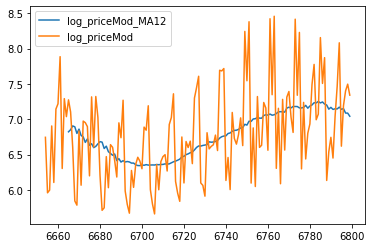

In [77]:
# smoothing the value using 12 month moving average
df_mum["log_priceMod_MA12"] = df_mum.log_priceMod.rolling(12).mean()
df_mum.plot(kind="line", y=["log_priceMod_MA12", "log_priceMod"])

In [78]:
df_mum["MA12_price"] = np.exp(df_mum.log_priceMod_MA12)
df_mum.sample(5)

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod,log_priceMod_diff,random_price,log_priceMod_MA12,MA12_price
6704,166430,405,2004-05-01,6,889,4,433,517,7,-1e+00,1327,6,574
6701,204200,981,2013-04-01,7,889,111,1332,1422,6,6e-01,544,6,572
6786,240700,1821,2014-11-01,8,889,130,1627,1544,8,-6e-01,3484,7,1400
6764,239880,547,2004-10-01,6,889,9,456,414,8,-2e+00,4714,7,1189
6717,221050,385,2005-06-01,6,889,17,496,480,6,-2e-01,455,6,614


In [80]:
MA_model_forcast = df_mum.log_priceMod_MA12.tail(12).mean()

# Evaluating MA12 Model using RMSE Model

In [82]:
MA12_model_RMSE = RMSE(df_mum.priceMod, df_mum.MA12_price)
MA12_model_RMSE

841.8072265328709

In [83]:
Result_df.loc[3,"Model"] = "Moving Average 12"
Result_df.loc[3,"Forcast"] = np.exp(MA_model_forcast)
Result_df.loc[3,"RMSE"] = MA12_model_RMSE
Result_df.head()

,Model,Forcast,RMSE
0,Mean Model,889,908
1,Linear Model,1754,725
2,Random Model,NaN,NaN
3,Moving Average 12,1255,842


In [84]:
def adf(ts):
    # Determing rolling statistics
    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()

    #Plot rolling statistics:
    ts.plot(color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    # Calculate ADF factors
    adftest = adfuller(ts, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    return adfoutput

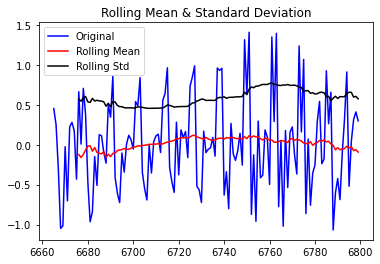

Test Statistic                -2e+00
p-value                        3e-01
# of Lags Used                 1e+01
Number of Observations Used    1e+02
Critical Value (1%)           -3e+00
Critical Value (5%)           -3e+00
Critical Value (10%)          -3e+00
dtype: float64

In [85]:
# Test remaining part for Stationary
ts = df_mum.log_priceMod - df_mum.log_priceMod_MA12
ts.dropna(inplace= True)
adf(ts)

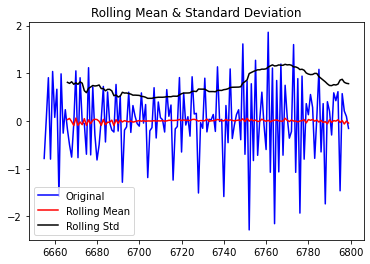

Test Statistic                -3e+00
p-value                        3e-02
# of Lags Used                 1e+01
Number of Observations Used    1e+02
Critical Value (1%)           -3e+00
Critical Value (5%)           -3e+00
Critical Value (10%)          -3e+00
dtype: float64

In [86]:
# Test remaining part for Stationary
ts = df_mum.log_priceMod_diff
ts.dropna(inplace = True)
adf(ts)

# Time Series Decomposition

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_mum.index = pd.to_datetime(df_mum.date)
df_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod,log_priceMod_diff,random_price,log_priceMod_MA12,MA12_price
date,,,,,,,,,,,,,
2004-01-01,267100,849,2004-01-01,7,889,0,415,346,NaN,NaN,NaN,NaN,NaN
2005-01-01,275845,387,2005-01-01,6,889,12,471,385,7,-8e-01,849,NaN,NaN
2006-01-01,228000,402,2006-01-01,6,889,24,534,507,6,4e-02,387,NaN,NaN
2007-01-01,205200,997,2007-01-01,7,889,36,606,625,6,9e-01,402,NaN,NaN
2008-01-01,267550,448,2008-01-01,6,889,48,687,583,7,-8e-01,997,NaN,NaN


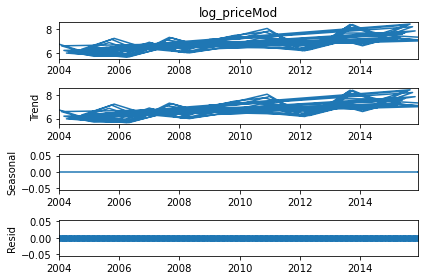

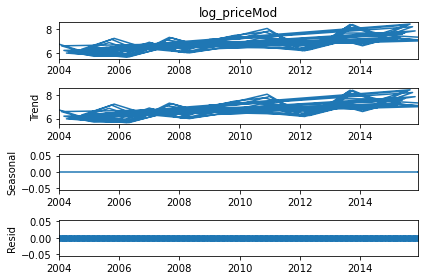

In [100]:
decomposition = seasonal_decompose(df_mum.log_priceMod, model = "additive",period = 1)
decomposition.plot()

In [104]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Evaluating the Decomposition model using RMSE

In [105]:
df_mum["decomp_price"] = np.exp(trend + seasonal)
decomp_model_RMSE = RMSE(df_mum.priceMod, df_mum.decomp_price)
decomp_model_RMSE

5.441055131619e-13

# ARIMA Model

In [106]:
ts = df_mum.log_priceMod
ts_diff = df_mum.log_priceMod_diff
ts_diff.dropna(inplace = True)

In [107]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_acf

array([ 1.        , -0.54612312,  0.35974009, -0.48269918,  0.31064144,
       -0.28581108,  0.25488628, -0.17927192,  0.20121241, -0.38328221,
        0.23712336, -0.33378314,  0.65536578, -0.26709031,  0.18329631,
       -0.31617105,  0.16054614, -0.14311553,  0.12853298, -0.08896203,
        0.17512094])

# ACF Plot

<AxesSubplot:>

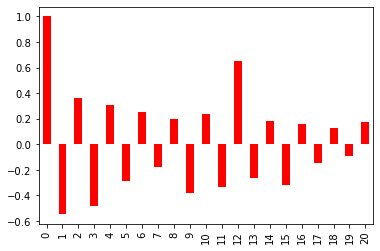

In [108]:
ACF = pd.Series(lag_acf)
ACF.plot(kind="bar", color="red")

# PACF Plot

<AxesSubplot:>

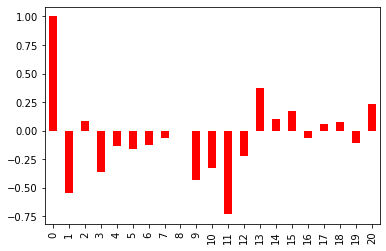

In [109]:
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
PACF = pd.Series(lag_pacf)
PACF.plot(kind="bar", color="red")

# Exponential Smoothing 

<AxesSubplot:xlabel='date'>

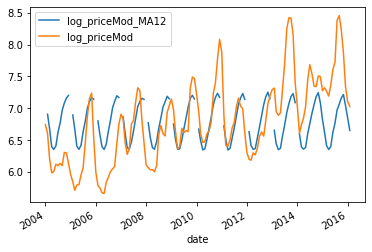

In [110]:
# smoothing the value using 12 month moving average
df_mum["log_priceMod_MA12"] = df_mum.log_priceMod.rolling(12).mean()
df_mum.plot(kind="line", y=["log_priceMod_MA12", "log_priceMod"])